In [4]:
import math
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('sample_data/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
digit_counts = df["Reviews"].dropna().astype(str).str[0].value_counts(normalize=True).drop('0')
digit_counts

1    0.280786
2    0.177659
3    0.117148
4    0.094087
5    0.073056
6    0.063740
7    0.052578
8    0.046675
9    0.039295
Name: Reviews, dtype: float64

In [7]:
digit_count_df = pd.DataFrame({"Leading Digit": digit_counts.index, "Observed": digit_counts.values})
digit_count_df

,Leading Digit,Observed
0,1,0.280786
1,2,0.177659
2,3,0.117148
3,4,0.094087
4,5,0.073056
5,6,0.063740
6,7,0.052578
7,8,0.046675
8,9,0.039295


In [8]:
expected = {
    "1": [math.log10((1+1)/1)],
    "2": [math.log10((2+1)/2)],
    "3": [math.log10((3+1)/3)],
    "4": [math.log10((4+1)/4)],
    "5": [math.log10((5+1)/5)],
    "6": [math.log10((6+1)/6)],
    "7": [math.log10((7+1)/7)],
    "8": [math.log10((8+1)/8)],
    "9": [math.log10((9+1)/9)]    
    }

expected_df = pd.DataFrame.from_dict(expected, orient='index',
                                     columns=['Benford']).set_index(
                                         pd.Index([0, 1, 2, 3, 4, 5, 6, 7, 8]))
expected_df

,Benford
0,0.301030
1,0.176091
2,0.124939
3,0.096910
4,0.079181
5,0.066947
6,0.057992
7,0.051153
8,0.045757


In [9]:
comparison_df = pd.concat([digit_count_df, expected_df], axis=1)
comparison_df

,Leading Digit,Observed,Benford
0,1,0.280786,0.301030
1,2,0.177659,0.176091
2,3,0.117148,0.124939
3,4,0.094087,0.096910
4,5,0.073056,0.079181
5,6,0.063740,0.066947
6,7,0.052578,0.057992
7,8,0.046675,0.051153
8,9,0.039295,0.045757


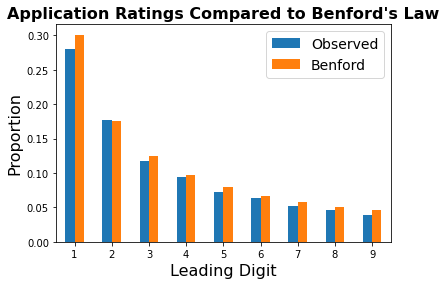

In [10]:
title = "Application Ratings Compared to Benford's Law"
comparison_df.plot(x="Leading Digit", kind="bar")
plt.title(title, fontsize=16, fontweight="bold")
plt.xlabel("Leading Digit", fontsize=16)
plt.ylabel("Proportion", fontsize=16)
plt.xticks(rotation=0)
plt.legend(fontsize=14)

In [11]:
chi_square = 0
for index, row in comparison_df.iterrows():
      single = (((row["Observed"] - row["Benford"])**2)/row["Benford"])
      chi_square = chi_square + single

chi_square


0.0043809164664262

In [41]:
import scipy.stats

#Chi-Square critical value
critical_value = scipy.stats.chi2.ppf(1-.05, df=8)
critical_value

15.50731305586545

Text(15.89, 0.045, 'Critical Value')

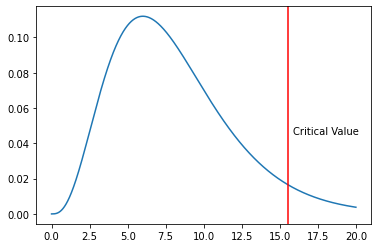

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

x = np.arange(0, 20, 0.001)

plt.plot(x, chi2.pdf(x, df=8))
plt.axvline(x=critical_value, color='r')
plt.text(15.89,0.045,'Critical Value')

###Another Way

In [12]:
%pip install scipy

In [43]:
from scipy.stats import chisquare

obs = comparison_df['Observed'].to_list()
exp = comparison_df['Benford'].to_list()
chisquare(obs, f_exp=exp)

Power_divergenceResult(statistic=0.0043809164664262, pvalue=0.9999999999990424)